In [1]:
#Importando librerias a utilizar para el analisis del dataset 
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('churn-bigml.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
State                     2666 non-null object
Account length            2666 non-null int64
Area code                 2666 non-null int64
International plan        2666 non-null object
Voice mail plan           2666 non-null object
Number vmail messages     2666 non-null int64
Total day minutes         2666 non-null float64
Total day calls           2666 non-null int64
Total day charge          2666 non-null float64
Total eve minutes         2666 non-null float64
Total eve calls           2666 non-null int64
Total eve charge          2666 non-null float64
Total night minutes       2666 non-null float64
Total night calls         2666 non-null int64
Total night charge        2666 non-null float64
Total intl minutes        2666 non-null float64
Total intl calls          2666 non-null int64
Total intl charge         2666 non-null float64
Customer service calls    2666 non-null int64


In [4]:
#Veamos como se relaciona la tasa de abandono con la variable plan internacional
pd.crosstab(df['Churn'],df['International plan'],margins=True)

International plan,No,Yes,All
Churn,,,
False,2126,152,2278
True,270,118,388
All,2396,270,2666


In [5]:
#Hacer plotting
import matplotlib.pyplot as plt 
import seaborn as sns

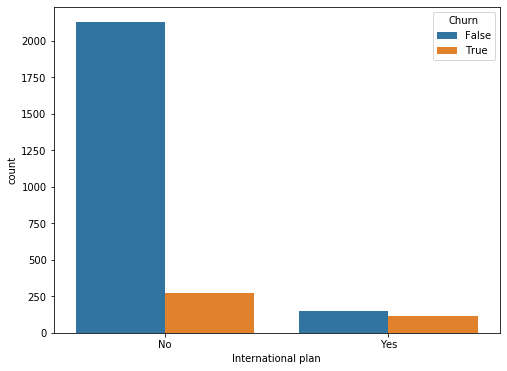

In [6]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='International plan', hue='Churn', data=df);

In [7]:
#Otra caracteristica importante la llamada al servicio al cliente
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)


Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,476,846,546,311,69,20,7,3,0,0,2278
True,79,99,62,37,64,29,10,5,1,2,388
All,555,945,608,348,133,49,17,8,1,2,2666


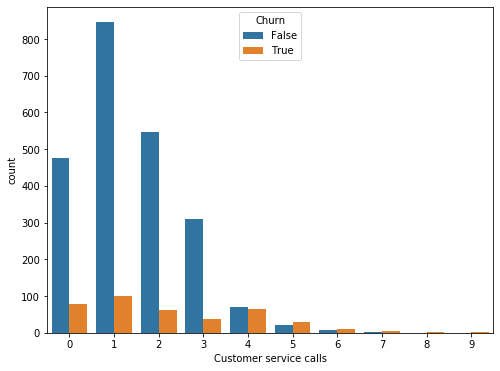

In [8]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

In [9]:
#Vamos a relacionar las dos caracteristicas para determinar si influyen o no en el abandono de los clientes 

#Creamos una nueva columna con esta condicion + de 3 llamadas al servicio al cliente 
df['Muchas_llamadas_serv_cliente']=(df['Customer service calls'] > 3).astype('int')

In [10]:
#Vemos los datos en una tabla de contingencia basica
pd.crosstab(index=df['Churn'] ,columns=df['Muchas_llamadas_serv_cliente'] ,margins=True)

Muchas_llamadas_serv_cliente,0,1,All
Churn,,,
False,2179,99,2278
True,277,111,388
All,2456,210,2666


In [11]:
#Creamos una tbl de contingencia basica con la suposicion de las llamadas internacionales activas
#y muchas llamadas al servicio al cliente

observados=pd.crosstab(index=df['Muchas_llamadas_serv_cliente'] & df['International plan'] ,columns=df['Churn'] ,margins=True)
observados

Churn,False,True,All
row_0,,,
False,2179,277,2456
True,99,111,210
All,2278,388,2666


In [12]:
#paquete para el analisis
#Vamos a validar si existe relacion entre las variables y el churn 
from scipy.stats import chi2_contingency

In [21]:

test=chi2_contingency(observados)
 
test


(268.94467032810627,
 5.38589008988988e-57,
 4,
 array([[2098.56264066,  357.43735934, 2456.        ],
        [ 179.43735934,   30.56264066,  210.        ],
        [2278.        ,  388.        , 2666.        ]]))

In [14]:
#Suma de las diferencias al cuadrado
test[0]

268.94467032810627

In [15]:
#conocido como p_valor 
#si el p_valor <0.05 hay diferencias significativas: hay relacion entre las variables 
#si el p_valor >0.05 no hay diferencias significativas: no hay relacion entre las variables 
test[1] 

5.38589008988988e-57

In [16]:
#el array es una tabla de valores esperados
test[3] 

array([[2098.56264066,  357.43735934, 2456.        ],
       [ 179.43735934,   30.56264066,  210.        ],
       [2278.        ,  388.        , 2666.        ]])

In [17]:
#convertimos en un dataframe
esperados=pd.DataFrame(test[3])
esperados

,0,1,2
0,2098.562641,357.437359,2456.0
1,179.437359,30.562641,210.0
2,2278.000000,388.000000,2666.0


In [18]:

#aplicamos la funcion apply para crear valores relativos y redondeamos
esperados_rl=round(esperados.apply(lambda r:r/len(df)*100,axis=1),2)
esperados_rl

,0,1,2
0,78.72,13.41,92.12
1,6.73,1.15,7.88
2,85.45,14.55,100.00


In [19]:
#aplicamos la funcion apply para crear valores relativos y redondeamos
#los margenes de lo observado vs lo esperado se deben mantener 
observados_rl=round(observados.apply(lambda r:r/len(df)*100,axis=1),2)
observados_rl

Churn,False,True,All
row_0,,,
False,81.73,10.39,92.12
True,3.71,4.16,7.88
All,85.45,14.55,100.00


In [20]:
#Existen mucha diferencia significativa entre lo esperado y observado 
#No existe relacion entre las variables 
test[1]

5.38589008988988e-57